In [93]:
# %matplotlib notebook
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import seaborn as sns

In [2]:
# Read in files

data_2015 = "chronicle_data2015.csv"
data_2016 = "chronicle_data2016.csv"
data_2017 = "chronicle_data2017.csv"
data_2018 = "chronicle_data2018.csv"

In [3]:
data_2015_pd = pd.read_csv(data_2015, encoding = "ISO-8859-1")
data_2016_pd = pd.read_csv(data_2016, encoding = "ISO-8859-1")
data_2017_pd = pd.read_csv(data_2017, encoding = "ISO-8859-1")
data_2018_pd = pd.read_csv(data_2018, encoding = "ISO-8859-1")

In [4]:
frames = [data_2015_pd, data_2016_pd, data_2017_pd, data_2018_pd]

big_df = pd.concat(frames)
big_df.head()

,Year,Donor,Where Donor Lives,Donor's Source of Wealth,Recipient,Recipient Location,Cause,Gift type,Gift Value
0,2015,John Santikos,Texas,Real estate,San Antonio Area Foundation,Texas,Community foundations,Bequest,"$605,000,000"
1,2015,John A. Paulson,New York,Finance,"Harvard U. (Cambridge, Mass.)",Massachusetts,Colleges and universities,Unrestricted,"$400,000,000"
2,2015,Stefan Edlis and Gael Neeson,Illinois,Manufacturing,Art Institute of Chicago,Illinois,Arts,Noncash Gift,"$400,000,000"
3,2015,William H. Scheide,New Jersey,Family wealth,Princeton U. (N.J.),New Jersey,Colleges and universities,Noncash Gift,"$300,000,000"
4,2015,David H. Koch,New York,Oil,Memorial Sloan-Kettering Cancer Center (New York),New York,Health,Pledge,"$150,000,000"


In [5]:
cause_sums = {}

for cause, data in big_df.groupby("Cause"):
    gift_value = (data["Gift Value"].values)
    cause_list = []
    for values in gift_value:
        float_amount = float(values.replace("$", "").replace(",", ""))
        cause_list.append(float_amount)
    cause_sums[cause] = sum(cause_list)
    
print(cause_sums)

{'Arts': 2629590000.0, 'Children and youths': 115770000.0, 'Colleges and universities': 22295399581.0, 'Community foundations': 1534213200.0, 'Conservation and the environment': 101740000.0, 'Education': 1130085000.0, 'Foundations': 4029782833.0, 'Health': 4674123099.0, 'Historic preservation': 177357161.0, 'Human and social services': 701750000.0, 'International': 75440000.0, 'Jewish federations': 44000000.0, 'Medical research': 31500000.0, 'Museums and libraries': 636550000.0, 'Other groups': 864699480.0, 'Public affairs': 641800000.0, 'Public safety': 23000000.0, 'Religious groups': 302820000.0, 'Science': 282700000.0, 'Social services': 343300000.0, 'Sports and recreation': 109000000.0, 'Zoos and aquariums': 136700000.0}


In [43]:
cause_value_df = pd.DataFrame.from_dict(cause_sums , orient='index')
cause_value_df = cause_value_df.reset_index()

In [49]:
clean_df = cause_value_df.rename(columns={"index" : "Cause", 0:'Donations'})
# clean_df['Donations'] = clean_df['Donations'].apply(lambda x: '{0:,.2f}'.format(x))
clean_df

,Cause,Donations
0,Arts,2.630e+09
1,Children and youths,1.158e+08
2,Colleges and universities,2.230e+10
3,Community foundations,1.534e+09
4,Conservation and the environment,1.017e+08
5,Education,1.130e+09
6,Foundations,4.030e+09
7,Health,4.674e+09
8,Historic preservation,1.774e+08
9,Human and social services,7.018e+08


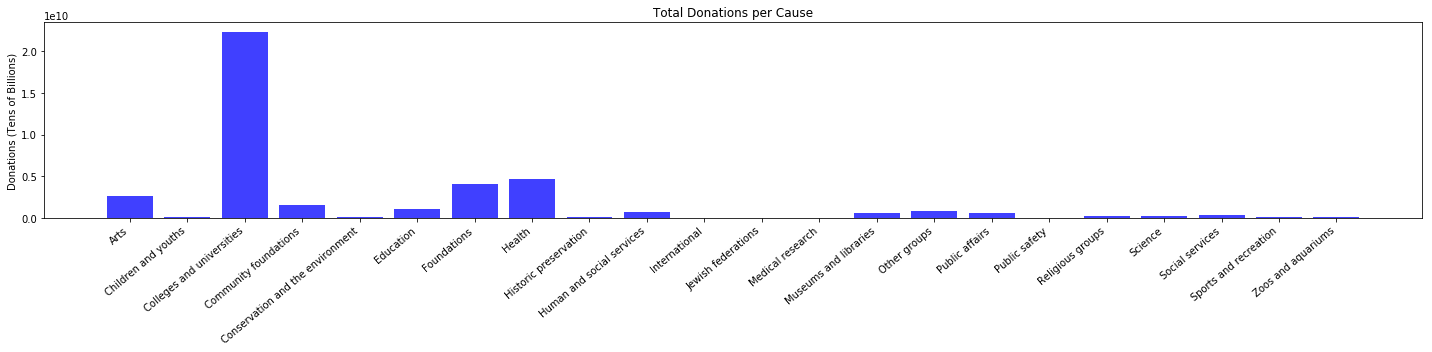

In [52]:
x_axis = clean_df["Cause"]
y_axis = clean_df['Donations']

plt.figure(figsize=(20,5))
plt.xticks(rotation=75)

plt.bar(x_axis, y_axis, color='blue', alpha=0.75, align="center")
plt.title("Total Donations per Cause")
ax = plt.gca()
ax.set_xticklabels(clean_df["Cause"], rotation=40, ha="right")
plt.ylabel("Donations (Tens of Billions)")
plt.tight_layout()
plt.savefig("Images/TotalDonationsperCause.png")
plt.show()

In [12]:
sorted_data = clean_df.sort_values(by =["Donations"], ascending=False)
topfive = sorted_data.iloc[:5]
print(topfive)

                       Cause     Donations
2  Colleges and universities  2.229540e+10
7                     Health  4.674123e+09
6                Foundations  4.029783e+09
0                       Arts  2.629590e+09
3      Community foundations  1.534213e+09


In [13]:
final_result = {}

for cause in topfive["Cause"]:
    test = big_df.loc[big_df["Cause"] == cause, :]
    top_df = test.drop(["Donor", "Recipient", "Where Donor Lives", "Donor's Source of Wealth", "Gift type",
                    "Recipient Location"], axis=1)

    cause_sums_top = {}
       
    for year, data in top_df.groupby("Year"):
        gift_value_top = data["Gift Value"].values
        cause_list_top = []
        for values in gift_value_top:
            float_amount = float(values.replace("$", "").replace(",", ""))
            cause_list_top.append(float_amount)
        cause_sums_top[year] = sum(cause_list_top)
    final_result[cause] = cause_sums_top
print(final_result)

{'Colleges and universities': {2015: 5086740500.0, 2016: 6950814379.0, 2017: 6636552702.0, 2018: 3621292000.0}, 'Health': {2015: 878230000.0, 2016: 898590000.0, 2017: 2091053099.0, 2018: 806250000.0}, 'Foundations': {2015: 73805583.0, 2016: 114800000.0, 2017: 3785574000.0, 2018: 55603250.0}, 'Arts': {2015: 983150000.0, 2016: 660570000.0, 2017: 771870000.0, 2018: 214000000.0}, 'Community foundations': {2015: 699500000.0, 2016: 326544000.0, 2017: 304769200.0, 2018: 203400000.0}}


In [110]:
final_top = pd.DataFrame.from_dict(final_result, orient="index")
# final_top = final_top.rename(columns={2015 : "Donations '15", 2016:"Donations '16", 2017: "Donations '17", 
#                                       2018: "Donations '18"})
# final_top.index.name="Cause"
final_top

,2015,2016,2017,2018
Arts,9.832e+08,6.606e+08,7.719e+08,2.140e+08
Colleges and universities,5.087e+09,6.951e+09,6.637e+09,3.621e+09
Community foundations,6.995e+08,3.265e+08,3.048e+08,2.034e+08
Foundations,7.381e+07,1.148e+08,3.786e+09,5.560e+07
Health,8.782e+08,8.986e+08,2.091e+09,8.062e+08


In [108]:
final_top.dtypes

Donations '15    float64
Donations '16    float64
Donations '17    float64
Donations '18    float64
dtype: object

['2015', '2016', '2017', '2018']
Arts
Colleges and universities
Community foundations
Foundations
Health


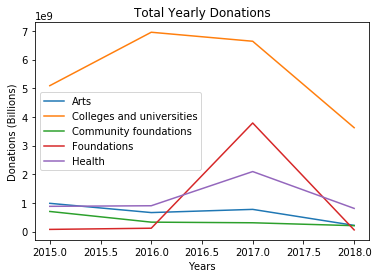

In [128]:
years = [str(2015), str(2016), str(2017), str(2018)]
print(years)

fig, ax = pyplot.subplots()
transposed_df = final_top.T
for row in transposed_df:
    print(row)
    data=transposed_df[row]
    data.plot()
plt.legend(loc="best" )   
plt.title("Total Yearly Donations")
plt.xlabel("Years")
plt.ylabel("Donations (Billions)")
plt.savefig("Images/TotalYearlyDonations.png")

In [53]:
test = data_2015_pd.groupby("Cause")["Gift Value"].sum()

causes_15 = []
cause_sums_15 = {}

causes_15 = data_2015_pd["Cause"].unique()

# Loop through data and pull gift totals for each cause

for cause, data in data_2015_pd.groupby("Cause"):
    gift_value = (data["Gift Value"].values)
    cause_list_15 = []
    for values in gift_value:
        float_amount = float(values.replace("$", "").replace(",", ""))
        cause_list_15.append(float_amount)
    cause_sums_15[cause] = sum(cause_list_15)
    
print(cause_sums_15)

{'Arts': 983150000.0, 'Children and youths': 68100000.0, 'Colleges and universities': 5086740500.0, 'Community foundations': 699500000.0, 'Conservation and the environment': 22500000.0, 'Education': 281650000.0, 'Foundations': 73805583.0, 'Health': 878230000.0, 'Historic preservation': 115000000.0, 'Human and social services': 164500000.0, 'International': 1090000.0, 'Museums and libraries': 141500000.0, 'Other groups': 143899480.0, 'Public affairs': 18000000.0, 'Religious groups': 75270000.0, 'Science': 11000000.0, 'Social services': 53000000.0, 'Sports and recreation': 38500000.0, 'Zoos and aquariums': 12600000.0}


In [54]:
cause_value_15 = pd.DataFrame.from_dict(cause_sums_15 , orient='index')
cause_value_15 = cause_value_15.reset_index()

clean_15 = cause_value_15.rename(columns={"index" : "Cause", 0:'Donations'})
clean_15

,Cause,Donations
0,Arts,9.832e+08
1,Children and youths,6.810e+07
2,Colleges and universities,5.087e+09
3,Community foundations,6.995e+08
4,Conservation and the environment,2.250e+07
5,Education,2.816e+08
6,Foundations,7.381e+07
7,Health,8.782e+08
8,Historic preservation,1.150e+08
9,Human and social services,1.645e+08


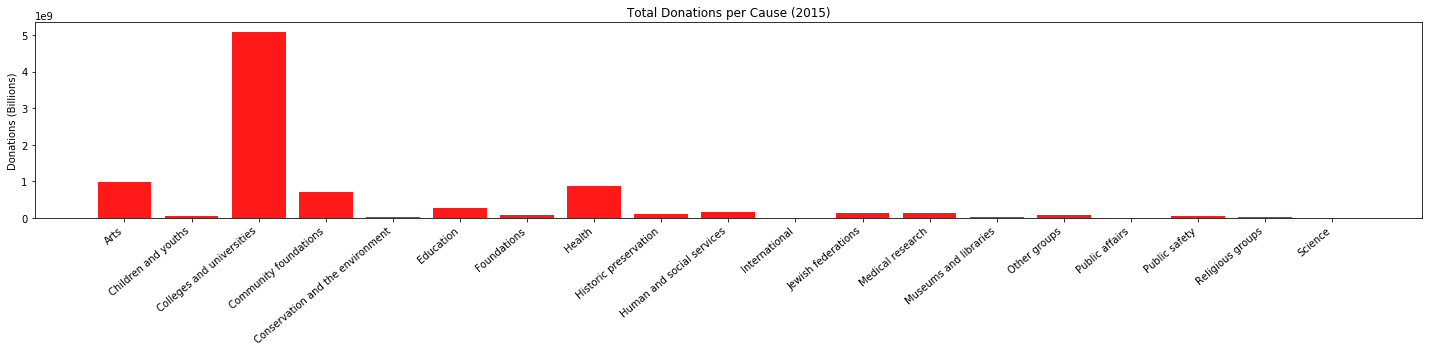

In [77]:
x_axis_15 = clean_15["Cause"]
y_axis_15 = clean_15["Donations"]

plt.figure(figsize=(20,5))
plt.xticks(rotation=75)

plt.bar(x_axis_15, y_axis_15, color='red', alpha=0.90, align="center")
plt.title("Total Donations per Cause (2015)")
ax = plt.gca()
ax.set_xticklabels(clean_df["Cause"], rotation=40, ha="right")
plt.ylabel("Donations (Billions)")

plt.tight_layout()
plt.savefig("Images/2015TotalDonationsperCause.png")
plt.show()

In [56]:
causes_16 = []
cause_sums_16 = {}

causes_16 = data_2016_pd["Cause"].unique()

# Loop through data and pull gift totals for each cause

for cause, data in data_2016_pd.groupby("Cause"):
    gift_value = (data["Gift Value"].values)
    cause_list_16 = []
    for values in gift_value:
        float_amount = float(values.replace("$", "").replace(",", ""))
        cause_list_16.append(float_amount)
    cause_sums_16[cause] = sum(cause_list_16)
    
print(cause_sums_16)

{'Arts': 660570000.0, 'Children and youths': 8570000.0, 'Colleges and universities': 6950814379.0, 'Community foundations': 326544000.0, 'Conservation and the environment': 10100000.0, 'Education': 235295000.0, 'Foundations': 114800000.0, 'Health': 898590000.0, 'Historic preservation': 34250000.0, 'Human and social services': 110750000.0, 'International': 1000000.0, 'Jewish federations': 28000000.0, 'Medical research': 11500000.0, 'Museums and libraries': 221150000.0, 'Other groups': 356400000.0, 'Public affairs': 531000000.0, 'Religious groups': 108750000.0, 'Science': 121500000.0, 'Social services': 284500000.0, 'Sports and recreation': 13500000.0, 'Zoos and aquariums': 22100000.0}


In [57]:
cause_value_16 = pd.DataFrame.from_dict(cause_sums_16 , orient='index')
cause_value_16 = cause_value_16.reset_index()

clean_16 = cause_value_16.rename(columns={"index" : "Cause", 0:'Donations'})
clean_16

,Cause,Donations
0,Arts,6.606e+08
1,Children and youths,8.570e+06
2,Colleges and universities,6.951e+09
3,Community foundations,3.265e+08
4,Conservation and the environment,1.010e+07
5,Education,2.353e+08
6,Foundations,1.148e+08
7,Health,8.986e+08
8,Historic preservation,3.425e+07
9,Human and social services,1.108e+08


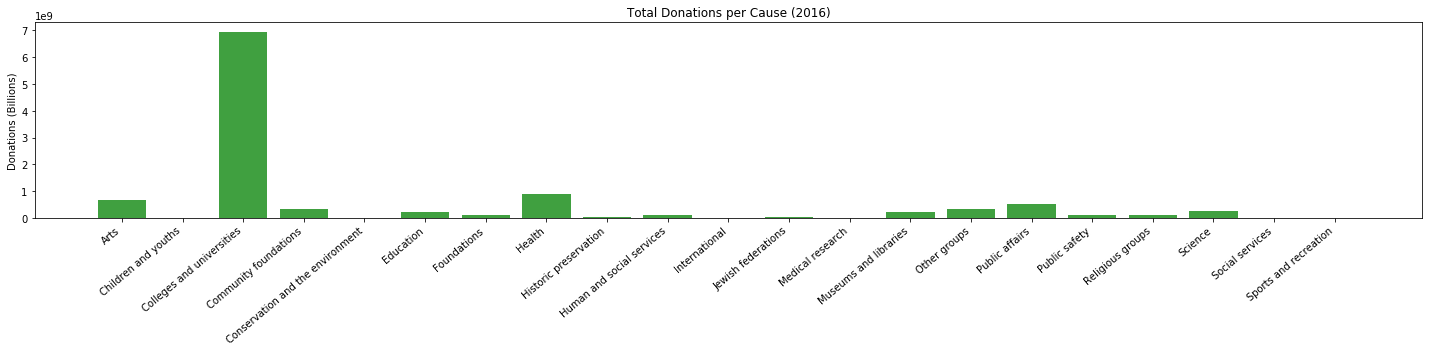

In [73]:
x_axis_16 = clean_16["Cause"]
y_axis_16 = clean_16["Donations"]

plt.figure(figsize=(20,5))
plt.xticks(rotation=75)

plt.bar(x_axis_16, y_axis_16, color='green', alpha=0.75, align="center")
plt.title("Total Donations per Cause (2016)")
ax = plt.gca()
ax.set_xticklabels(clean_df["Cause"], rotation=40, ha="right")
plt.ylabel("Donations (Billions)")

plt.tight_layout()
plt.savefig("Images/2016TotalDonationsperCause.png")
plt.show()

In [70]:
causes_17 = []
cause_sums_17 = {}

causes_17 = data_2017_pd["Cause"].unique()

# Loop through data and pull gift totals for each cause

for cause, data in data_2017_pd.groupby("Cause"):
    gift_value = (data["Gift Value"].values)
    cause_list_17 = []
    for values in gift_value:
        float_amount = float(values.replace("$", "").replace(",", ""))
        cause_list_17.append(float_amount)
    cause_sums_17[cause] = sum(cause_list_17)
print(cause_sums_17)

cause_value_17 = pd.DataFrame.from_dict(cause_sums_17 , orient='index')
cause_value_17 = cause_value_17.reset_index()

clean_17 = cause_value_17.rename(columns={"index" : "Cause", 0:'Donations'})
clean_17

{'Arts': 771870000.0, 'Children and youths': 16100000.0, 'Colleges and universities': 6636552702.0, 'Community foundations': 304769200.0, 'Conservation and the environment': 63140000.0, 'Education': 413100000.0, 'Foundations': 3785574000.0, 'Health': 2091053099.0, 'Historic preservation': 27107161.0, 'Human and social services': 323750000.0, 'International': 37850000.0, 'Jewish federations': 16000000.0, 'Medical research': 20000000.0, 'Museums and libraries': 229100000.0, 'Other groups': 134400000.0, 'Public affairs': 67800000.0, 'Public safety': 1000000.0, 'Religious groups': 47800000.0, 'Science': 25200000.0, 'Social services': 5800000.0, 'Sports and recreation': 57000000.0, 'Zoos and aquariums': 52000000.0}


,Cause,Donations
0,Arts,7.719e+08
1,Children and youths,1.610e+07
2,Colleges and universities,6.637e+09
3,Community foundations,3.048e+08
4,Conservation and the environment,6.314e+07
5,Education,4.131e+08
6,Foundations,3.786e+09
7,Health,2.091e+09
8,Historic preservation,2.711e+07
9,Human and social services,3.238e+08


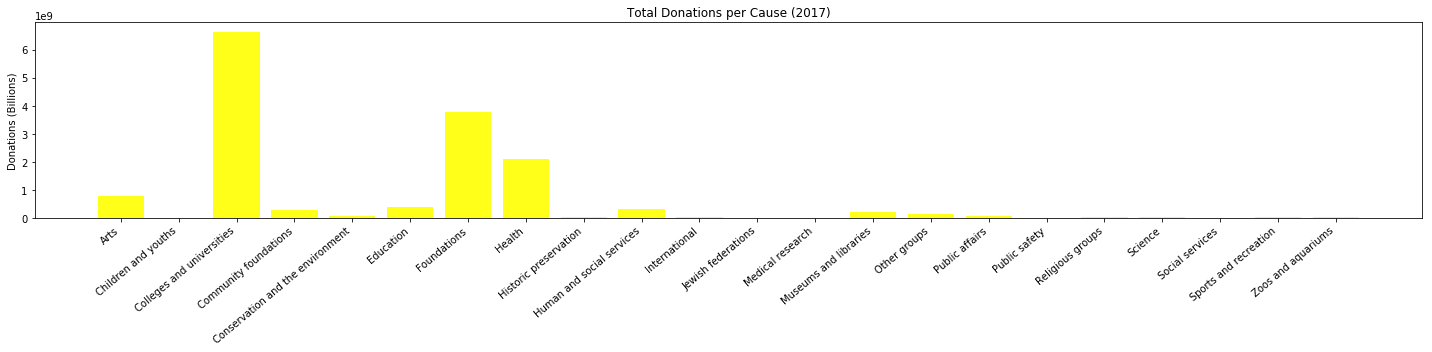

In [71]:
x_axis_17 = clean_17["Cause"]
y_axis_17 = clean_17["Donations"]

plt.figure(figsize=(20,5))
plt.xticks(rotation=75)

plt.bar(x_axis_17, y_axis_17, color='yellow', alpha=0.90, align="center")
plt.title("Total Donations per Cause (2017)")
ax = plt.gca()
ax.set_xticklabels(clean_df["Cause"], rotation=40, ha="right")
plt.ylabel("Donations (Billions)")

plt.tight_layout()
plt.savefig("Images/2017TotalDonationsperCause.png")
plt.show()

In [65]:
causes_18 = []
cause_sums_18 = {}

causes_18 = data_2018_pd["Cause"].unique()

# Loop through data and pull gift totals for each cause

for cause, data in data_2018_pd.groupby("Cause"):
    gift_value = (data["Gift Value"].values)
    cause_list_18 = []
    for values in gift_value:
        float_amount = float(values.replace("$", "").replace(",", ""))
        cause_list_18.append(float_amount)
    cause_sums_18[cause] = sum(cause_list_18)

cause_value_18 = pd.DataFrame.from_dict(cause_sums_18 , orient='index')
cause_value_18 = cause_value_18.reset_index()

clean_18 = cause_value_18.rename(columns={"index" : "Cause", 0:'Donations'})
clean_18

,Cause,Donations
0,Arts,2.140e+08
1,Children and youths,2.300e+07
2,Colleges and universities,3.621e+09
3,Community foundations,2.034e+08
4,Conservation and the environment,6.000e+06
5,Education,2.000e+08
6,Foundations,5.560e+07
7,Health,8.062e+08
8,Historic preservation,1.000e+06
9,Human and social services,1.028e+08


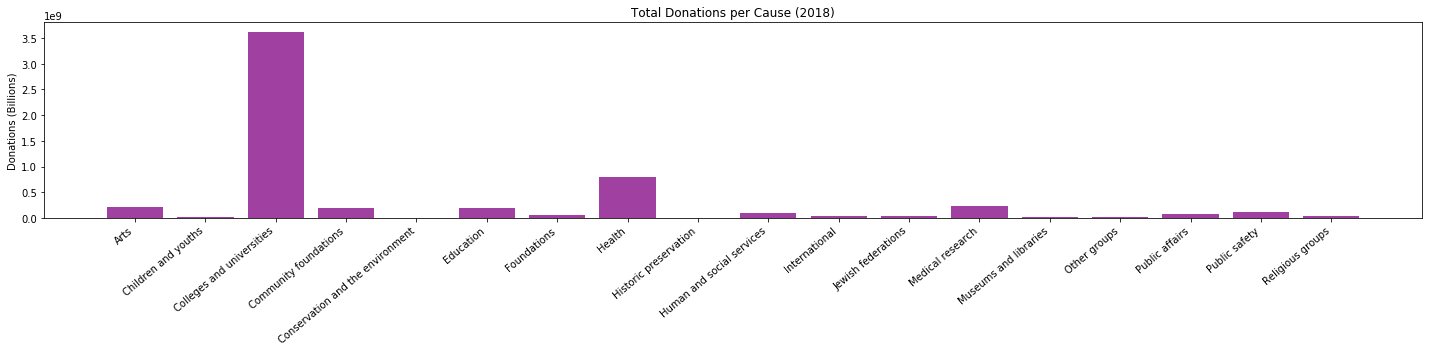

In [74]:
x_axis_18 = clean_18["Cause"]
y_axis_18 = clean_18["Donations"]

plt.figure(figsize=(20,5))
plt.xticks(rotation=75)

plt.bar(x_axis_18, y_axis_18, color='purple', alpha=0.75, align="center")
plt.title("Total Donations per Cause (2018)")
ax = plt.gca()
ax.set_xticklabels(clean_df["Cause"], rotation=40, ha="right")
plt.ylabel("Donations (Billions)")

plt.tight_layout()
plt.savefig("Images/2018TotalDonationsperCause.png")
plt.show()